# Análisis Exploratorio

## 1.Inicializando Librerías

In [102]:
import sklearn
import numpy as np
import seaborn as sb
import matplotlib.pylab as plt
import pandas as pd

## 2.Lectura del Dataset

In [103]:
df = pd.read_csv('datos_banco.csv', encoding = "ISO-8859-1")

In [104]:
df.head(5)

,idPrestamo,target,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,person_gender,credit_history_marital_status,var_max_sbs_qual_12m,person_degree_type_desc,default_request_term,default_request_amount
0,LIBDISP9832897855,1,252.39,9.0,"1,200",6,289.11,1140.125000,MALE,C,NORMAL,Secundaria,1,0
1,LIBDISP9021501745,1,244.57,50.0,"2,200",12,696.15,1061.375000,FEMALE,S,NORMAL,Secundaria,0,0
2,LIBDISP4057314971,0,491.5,64.0,"1,000",3,84.99,2082.196667,FEMALE,S,NORMAL,Secundaria,0,0
3,LIBDISP8375185888,0,848.65,77.0,"1,500",6,221.53,3422.423333,MALE,S,NORMAL,Universitaria,0,0
4,LIBDISP9694463037,0,470.52,82.0,"1,000",3,91.34,1882.090000,FEMALE,S,NORMAL,Universitaria,1,0


In [105]:
df.shape

(1719, 14)

## 3.Descartamos variables

In [106]:
x_df = df.drop(["target","person_gender","default_request_term","default_request_amount","person_degree_type_desc"], axis = 1)
y_df = df["target"]

print("shape of x_df = ", x_df.shape)
print("shape of y_df = ", y_df.shape)

shape of x_df =  (1719, 9)
shape of y_df =  (1719,)


In [107]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.39,9.0,"1,200",6,289.11,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.57,50.0,"2,200",12,696.15,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.5,64.0,"1,000",3,84.99,2082.196667,S,NORMAL
3,LIBDISP8375185888,848.65,77.0,"1,500",6,221.53,3422.423333,S,NORMAL
4,LIBDISP9694463037,470.52,82.0,"1,000",3,91.34,1882.090000,S,NORMAL


## 4.Exploración y corrección de valores 

In [108]:
x_df.groupby('var_max_sbs_qual_12m').size()

var_max_sbs_qual_12m
CPP            202
DEFICIENTE      31
DUDOSO           1
NORMAL        1481
PERDIDA          4
dtype: int64

In [109]:
x_df["monthly_debt_capacity"] = x_df["monthly_debt_capacity"].replace(',','', regex=True)
x_df["monthly_debt_capacity"] = pd.to_numeric(x_df["monthly_debt_capacity"], downcast="float")

x_df["approved_amount"] = x_df["approved_amount"].replace(',','', regex=True)
x_df["approved_amount"] = pd.to_numeric(x_df["approved_amount"], downcast="float")

x_df["approved_term"] = x_df["approved_term"].replace(',','', regex=True)
x_df["approved_term"] = pd.to_numeric(x_df["approved_term"], downcast="float")

x_df["approved_interest_amount"] = x_df["approved_interest_amount"].replace(',','', regex=True)
x_df["approved_interest_amount"] = pd.to_numeric(x_df["approved_interest_amount"], downcast="float")

x_df["var_employment_time_in_months"] = x_df["var_employment_time_in_months"].replace(',','', regex=True)
x_df["var_employment_time_in_months"] = pd.to_numeric(x_df["var_employment_time_in_months"], downcast="float")

x_df["var_net_income"] = x_df["var_net_income"].replace(',','', regex=True)
x_df["var_net_income"] = pd.to_numeric(x_df["var_net_income"], downcast="float")

x_df.head()

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,credit_history_marital_status,var_max_sbs_qual_12m
0,LIBDISP9832897855,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,C,NORMAL
1,LIBDISP9021501745,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,S,NORMAL
2,LIBDISP4057314971,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,S,NORMAL
3,LIBDISP8375185888,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,S,NORMAL
4,LIBDISP9694463037,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,S,NORMAL


In [110]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639465,33.979591,2136.998291,6.464805,407.185822,2693.545898
std,459.958893,26.889423,1504.944702,3.009842,407.703064,1825.694702
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000


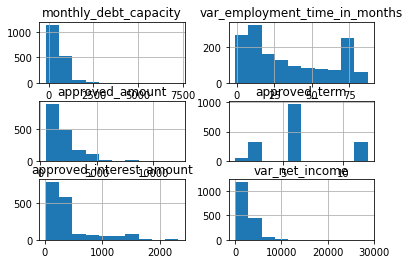

In [111]:
x_df.hist();


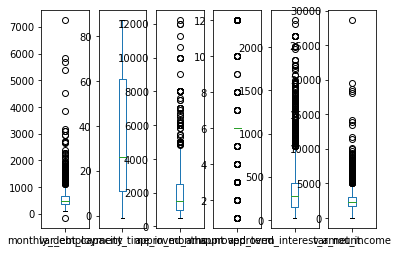

In [112]:
x_df.plot(kind='box', subplots=True);

## 5.One hot encoding para columnas categóricas

In [113]:
for i,id in enumerate(x_df["idPrestamo"]):
    x_df['idPrestamo'][i]=i

#
x_df = pd.concat([x_df,pd.get_dummies(df['credit_history_marital_status'], prefix='CHMS')],axis=1)
x_df.drop(['credit_history_marital_status'],axis=1, inplace=True)

x_df = pd.concat([x_df,pd.get_dummies(df['var_max_sbs_qual_12m'], prefix='VMSQ12')],axis=1)
x_df.drop(['var_max_sbs_qual_12m'],axis=1, inplace=True)


In [114]:
x_df.head(5)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,1,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,2,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,3,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,4,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0


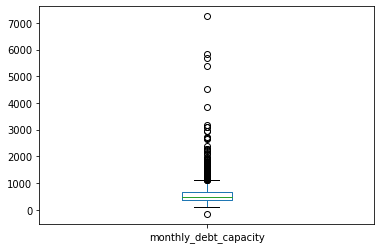

In [115]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True);

In [116]:
x_df.describe()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
count,1719.000000,1519.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000,1719.000000
mean,584.639465,33.979591,2136.998291,6.464805,407.185822,2693.545898,0.162885,0.007563,0.828970,0.000582,0.117510,0.018034,0.000582,0.861547,0.002327
std,459.958893,26.889423,1504.944702,3.009842,407.703064,1825.694702,0.369369,0.086659,0.376644,0.024119,0.322121,0.133112,0.024119,0.345475,0.048196
min,-158.750000,-1.000000,500.000000,1.000000,22.820000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,350.760010,11.000000,1000.000000,6.000000,152.320007,1750.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,480.739990,26.000000,1500.000000,6.000000,281.390015,2373.758301,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,660.820007,61.000000,2500.000000,6.000000,429.799988,3075.133423,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,7243.200195,87.000000,12200.000000,12.000000,2311.120117,28587.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 6.Reemplazamos Valores Faltantes


In [117]:
num_vars = x_df.select_dtypes(include=["int32","float32"]).columns
x_df["approved_term"].dtype

dtype('float32')

In [118]:
num_vars 

Index(['monthly_debt_capacity', 'var_employment_time_in_months',
       'approved_amount', 'approved_term', 'approved_interest_amount',
       'var_net_income'],
      dtype='object')

In [119]:
x_df[num_vars].isnull().sum()

monthly_debt_capacity              0
var_employment_time_in_months    200
approved_amount                    0
approved_term                      0
approved_interest_amount           0
var_net_income                     0
dtype: int64

In [120]:
from sklearn.impute import SimpleImputer

imputer_mean = SimpleImputer(strategy = "mean")

In [121]:
imputer_mean.fit(x_df[num_vars])

SimpleImputer()

In [122]:
imputer_mean.statistics_

array([ 584.63947062,   33.97959184, 2136.9982548 ,    6.46480512,
        407.18582752, 2693.54595695])

In [123]:
imputer_mean.transform(x_df[num_vars])

array([[ 252.39  ,    9.    , 1200.    ,    6.    ,  289.11  , 1140.125 ],
       [ 244.57  ,   50.    , 2200.    ,   12.    ,  696.15  , 1061.375 ],
       [ 491.5   ,   64.    , 1000.    ,    3.    ,   84.99  , 2082.1968],
       ...,
       [ 692.13  ,   56.    , 2500.    ,    6.    ,  360.78  , 2768.5   ],
       [ 410.28  ,   80.    ,  900.    ,    3.    ,   79.89  , 2139.2583],
       [ 480.74  ,   12.    , 1000.    ,    3.    ,   84.99  , 2083.33  ]],
      dtype=float32)

In [124]:
x_df[num_vars] = imputer_mean.transform(x_df[num_vars])

In [125]:
x_df[num_vars].isnull().sum()

monthly_debt_capacity            0
var_employment_time_in_months    0
approved_amount                  0
approved_term                    0
approved_interest_amount         0
var_net_income                   0
dtype: int64

## 7.Normalización

In [126]:
import pandas as pd
from sklearn import preprocessing

# x = x_df["monthly_debt_capacity"].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled_test = min_max_scaler.fit_transform(x_df["monthly_debt_capacity"][:,np.newaxis])
df_test1 = pd.DataFrame(x_scaled_test)

X_normalized = preprocessing.normalize(x_df["monthly_debt_capacity"][:,np.newaxis], norm='l2')
df_test = pd.DataFrame(X_normalized)

# df_test1.head(10)
# df_test1.describe()

#x_df["monthly_debt_capacity"]=x_scaled_test

monthly_debt_capacity    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

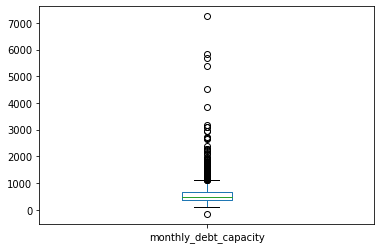

In [127]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True)

In [128]:
x_df.head(10)

,idPrestamo,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
0,0,252.389999,9.000000,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,1,244.570007,50.000000,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,2,491.500000,64.000000,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,3,848.650024,77.000000,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,4,470.519989,82.000000,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0
5,5,490.769989,79.000000,1500.0,6.0,221.529999,2448.016602,0,0,1,0,0,0,0,1,0
6,6,428.570007,71.000000,4000.0,12.0,1109.560059,1803.923340,0,0,1,0,0,0,0,1,0
7,7,647.869995,4.000000,1200.0,6.0,289.109985,2660.629883,0,0,1,0,0,0,0,1,0
8,8,694.229980,33.979591,900.0,6.0,149.789993,2912.158447,1,0,0,0,1,0,0,0,0
9,9,209.479996,77.000000,1000.0,6.0,152.320007,2498.043213,0,0,1,0,0,0,0,1,0


## 8.Definición de columna Idprestamo como Índices

In [129]:
x_df = x_df.set_index("idPrestamo")

Dropping the negative value that was in the column : monthly_debt_capacity

In [130]:

indexPoorValue = x_df[x_df["monthly_debt_capacity"]<0].index[0]
x_df =x_df.drop([indexPoorValue])
y_df =y_df.drop([indexPoorValue])
x_df[x_df["monthly_debt_capacity"]<0]


,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
idPrestamo,,,,,,,,,,,,,,,


monthly_debt_capacity    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

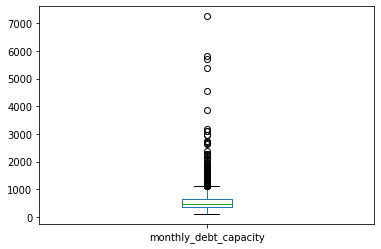

In [131]:
x_df["monthly_debt_capacity"].plot(kind='box', subplots=True)

Splitting dataset into 80-20

In [132]:
splitIndex = int(x_df.shape[0]*0.8)
X_train = x_df.iloc[:splitIndex].to_numpy()
X_test = x_df.iloc[splitIndex:].to_numpy()

Y_train = y_df.iloc[:splitIndex].to_numpy()
Y_test = y_df.iloc[splitIndex:].to_numpy()

In [133]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [134]:
model = Sequential([Dense(8, input_dim=X_test.shape[1], activation='relu'),
                    Dense(18,activation='relu'),
                    Dense(25,activation='relu'),
                    Dense(30,activation='relu'),
                    Dense(10,activation='relu'),
                    Dense(3, activation='softmax')])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
x_df.head()

,monthly_debt_capacity,var_employment_time_in_months,approved_amount,approved_term,approved_interest_amount,var_net_income,CHMS_C,CHMS_D,CHMS_S,CHMS_V,VMSQ12_CPP,VMSQ12_DEFICIENTE,VMSQ12_DUDOSO,VMSQ12_NORMAL,VMSQ12_PERDIDA
idPrestamo,,,,,,,,,,,,,,,
0,252.389999,9.0,1200.0,6.0,289.109985,1140.125000,1,0,0,0,0,0,0,1,0
1,244.570007,50.0,2200.0,12.0,696.150024,1061.375000,0,0,1,0,0,0,0,1,0
2,491.500000,64.0,1000.0,3.0,84.989998,2082.196777,0,0,1,0,0,0,0,1,0
3,848.650024,77.0,1500.0,6.0,221.529999,3422.423340,0,0,1,0,0,0,0,1,0
4,470.519989,82.0,1000.0,3.0,91.339996,1882.089966,0,0,1,0,0,0,0,1,0


In [135]:
hist = model.fit(X_train, Y_train, epochs=50, batch_size=10, verbose=2)

Epoch 1/50
138/138 - 0s - loss: 3.0421 - accuracy: 0.4905
Epoch 2/50
138/138 - 0s - loss: 2.1867 - accuracy: 0.5182
Epoch 3/50
138/138 - 0s - loss: 2.1013 - accuracy: 0.4956
Epoch 4/50
138/138 - 0s - loss: 2.1465 - accuracy: 0.5087
Epoch 5/50
138/138 - 0s - loss: 2.1023 - accuracy: 0.5124
Epoch 6/50
138/138 - 0s - loss: 1.9815 - accuracy: 0.5036
Epoch 7/50
138/138 - 0s - loss: 1.9623 - accuracy: 0.4949
Epoch 8/50
138/138 - 0s - loss: 1.9509 - accuracy: 0.4927
Epoch 9/50
138/138 - 0s - loss: 1.1886 - accuracy: 0.4039
Epoch 10/50
138/138 - 0s - loss: 0.6834 - accuracy: 0.3057
Epoch 11/50
138/138 - 0s - loss: 0.6291 - accuracy: 0.2664
Epoch 12/50
138/138 - 0s - loss: 0.6240 - accuracy: 0.2001
Epoch 13/50
138/138 - 0s - loss: 0.6090 - accuracy: 0.0684
Epoch 14/50
138/138 - 0s - loss: 0.6077 - accuracy: 0.0291
Epoch 15/50
138/138 - 0s - loss: 0.6076 - accuracy: 0.0342
Epoch 16/50
138/138 - 0s - loss: 0.6074 - accuracy: 0.1863
Epoch 17/50
138/138 - 0s - loss: 0.6085 - accuracy: 0.2999
Epoch 

In [137]:
X_test.shape[0]
Y_test.shape[0]
model.evaluate(X_test, Y_test)

11/11 [==============================] - 0s 4ms/step - loss: 0.6251 - accuracy: 0.3169


[0.6250959038734436, 0.31686046719551086]